/kaggle/input/spaceship-titanic/sample_submission.csv
/kaggle/input/spaceship-titanic/train.csv
/kaggle/input/spaceship-titanic/test.csv


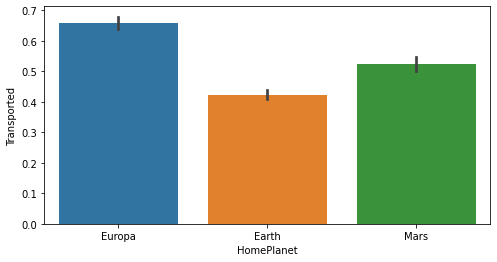

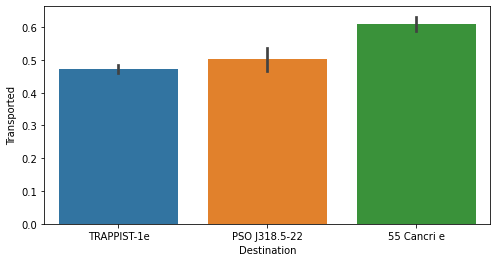

(8693, 12)
(4277, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8693 non-null   float64
 1   CryoSleep     8693 non-null   float64
 2   Cabin         8693 non-null   object 
 3   Destination   8693 non-null   float64
 4   Age           8693 non-null   float64
 5   VIP           8693 non-null   float64
 6   RoomService   8693 non-null   float64
 7   FoodCourt     8693 non-null   float64
 8   ShoppingMall  8693 non-null   float64
 9   Spa           8693 non-null   float64
 10  VRDeck        8693 non-null   float64
 11  Transported   8693 non-null   int64  
dtypes: float64(10), int64(1), object(1)
memory usage: 815.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePl

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:74: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:75: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.


0.7860839562967222
0.780333525014376
0.7872340425531915
0.7757331799884991
0.7843588269120184
              precision    recall  f1-score   support

           0       0.78      0.76      0.77       822
           1       0.79      0.80      0.80       917

    accuracy                           0.78      1739
   macro avg       0.78      0.78      0.78      1739
weighted avg       0.78      0.78      0.78      1739

Model aniqligi: 0.7837837837837838


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


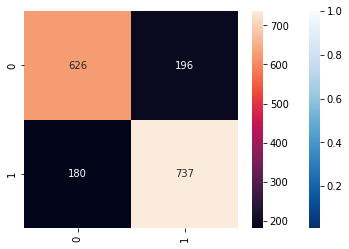

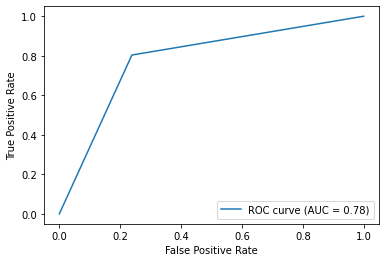

              precision    recall  f1-score   support

           0       0.75      0.81      0.78       822
           1       0.82      0.76      0.79       917

    accuracy                           0.78      1739
   macro avg       0.79      0.79      0.78      1739
weighted avg       0.79      0.78      0.79      1739

Model aniqligi: 0.7849338700402531


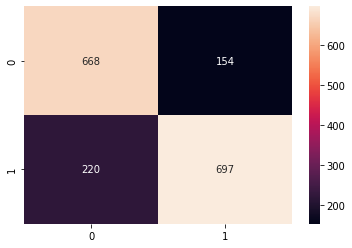

              precision    recall  f1-score   support

           0       0.76      0.79      0.78       822
           1       0.81      0.78      0.79       917

    accuracy                           0.79      1739
   macro avg       0.79      0.79      0.79      1739
weighted avg       0.79      0.79      0.79      1739

Model aniqligi: 0.7855089131684876


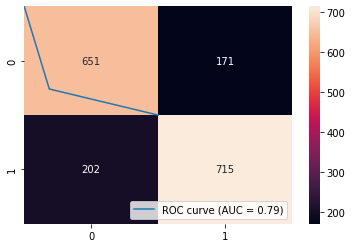

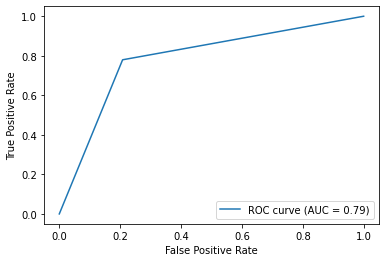

              precision    recall  f1-score   support

           0       0.54      0.77      0.64       822
           1       0.67      0.41      0.51       917

    accuracy                           0.58      1739
   macro avg       0.61      0.59      0.58      1739
weighted avg       0.61      0.58      0.57      1739

Model aniqligi: 0.5848188614146062


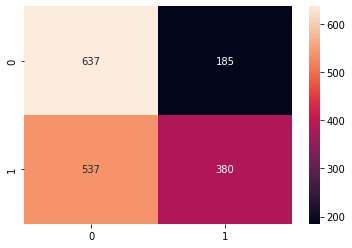

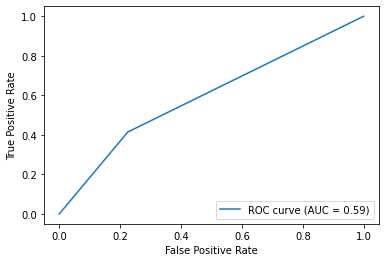

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.metrics import classification_report, confusion_matrix
import sklearn.metrics as metrics

from sklearn import linear_model
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from xgboost import XGBClassifier
from sklearn.svm import SVC
# manual nested cross-validation for random forest on a classification dataset
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

from sklearn.model_selection import GridSearchCV
from catboost import CatBoostClassifier, Pool
train=pd.read_csv("/kaggle/input/spaceship-titanic/train.csv")
test=pd.read_csv("/kaggle/input/spaceship-titanic/test.csv")
sample=pd.read_csv("/kaggle/input/spaceship-titanic/sample_submission.csv")
train.head()
test.head()
plt.figure(figsize=(8,4))
sns.barplot(x= 'HomePlanet', y= 'Transported', data= train)
plt.show()
plt.figure(figsize=(8,4))
sns.barplot(x= 'Destination', y= 'Transported', data= train)
plt.show()
train['Destination'].unique()
train.replace({'Europa':7, 'Earth':4, 'Mars':5},inplace=True)
train.replace({'TRAPPIST-1e':4, 'PSO J318.5-22':5, '55 Cancri e':6},inplace=True)
train.replace({False:0,True:1},inplace=True)

test.replace({'Europa':7, 'Earth':4, 'Mars':5},inplace=True)
test.replace({'TRAPPIST-1e':4, 'PSO J318.5-22':5, '55 Cancri e':6},inplace=True)
test.replace({False:0,True:1},inplace=True)
train.drop(['PassengerId','Name'],axis=1,inplace=True)
test.drop(['PassengerId','Name'],axis=1,inplace=True)
print(train.shape)
print(test.shape)
train.Transported.value_counts()
train.isnull().sum()
train=train.fillna(train.median())
test=test.fillna(test.median())
train=train.fillna(method='bfill')
test=test.fillna(method='bfill')
train.groupby('Transported').mean().T
train.info()
train.nunique()
train.corrwith(train['Transported']).abs().sort_values(ascending=False)
train.corr()
sns.heatmap(train.corr().abs(),cmap='Blues_r')
train['Cab0']=train['Cabin'].str[0]
test['Cab0']=test['Cabin'].str[0]
train['Cab-1']=train['Cabin'].str[-1]
test['Cab-1']=test['Cabin'].str[-1]
train.head()
train['Cab0'].unique()
X = train.copy()
y = train.Transported
X = X.drop('Transported',axis=1)
X.info()
X.columns
cat_attr=[ 'Cabin','Cab0','Cab-1']
num_attr=['HomePlanet', 'CryoSleep', 'Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 
          'Spa', 'VRDeck', 'Destination','VIP']

full_pip=ColumnTransformer([
    ('num',StandardScaler(),num_attr),
    ('cat',OrdinalEncoder(),cat_attr)
])
x=full_pip.fit_transform(X)
x_test=full_pip.fit_transform(test)
x_train,x_val,y_train,y_val=train_test_split(x,y,test_size=0.2,random_state=41)
javob = []
for N in range(5):
    model = RandomForestClassifier(random_state=N, n_jobs=6, n_estimators=126)
    model.fit(x_train, y_train)
    preds_valid = model.predict(x_val)
    test_preds = model.predict(x_test)
    javob.append(test_preds)
    print(accuracy_score(y_val, preds_valid))
    LR_model = LogisticRegression()
LR_model.fit(x_train, y_train)


y_pred = LR_model.predict(x_val)
print(metrics.classification_report(y_val, y_pred))
print("Model aniqligi:", metrics.accuracy_score(y_val,y_pred))

## confusion matrix
conf_mat = metrics.confusion_matrix(y_val, y_pred)
sns.heatmap(conf_mat, annot=True,fmt="g")
plt.show()

## ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_val, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()
# Create model
RF_model = RandomForestClassifier(n_estimators=9)
RF_model.fit(x_train, y_train)

y_pred = RF_model.predict(x_val)
print(classification_report(y_val, y_pred))
print("Model aniqligi:", accuracy_score(y_val,y_pred))

## confusion matrix
conf_mat = metrics.confusion_matrix(y_val, y_pred)
sns.heatmap(conf_mat, annot=True,fmt="g")
plt.show()

## ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_val, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
xgb_model = XGBClassifier()
xgb_model.fit(x_train, y_train)


y_pred = xgb_model.predict(x_val)
print(classification_report(y_val, y_pred))
print("Model aniqligi:", accuracy_score(y_val,y_pred))

# confusion matrix
conf_mat = metrics.confusion_matrix(y_val, y_pred)
sns.heatmap(conf_mat, annot=True,fmt="g")
plt.show()

# ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_val, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()
tree_model=DecisionTreeClassifier()
tree_model.fit(x_train,y_train)
y_tree=tree_model.predict(x_val)
accuracy_score(y_val,y_tree)
svm_model = SVC()
svm_model.fit(x_train, y_train)

# Modelni baholaymiz

y_pred = svm_model.predict(x_val)
print(classification_report(y_val, y_pred))
print("Model aniqligi:", accuracy_score(y_val,y_pred))

## confusion matrix
conf_mat = metrics.confusion_matrix(y_val, y_pred)
sns.heatmap(conf_mat, annot=True,fmt="g")
plt.show()

## ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_val, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()
natija = xgb_model.predict(x_test)
natija
sample['Transported'] = natija
sample
sample.replace({0:False,1:True},inplace=True)
sample.to_csv('submission.csv',index=False)